---
# Milestone 2

Name: Bryan Robinson

Batch: BSD-003

---
# Chapter 1: Introduction


**Objective**: 

I am a data scientist working at a hospital and i was tasked to create a machine learning capable model in order to predict whether the person have diabetes with the inputted variables. False negative (The person do has diabetes but is not detected as such) is a serious issue and thus must be lowered down as much as possible for the prediction model, therefore recall score must be very high. I will use tools such as pipelines to streamline the model, cross validation will also be used to figure out the best model for increasing recall score. The dataset is given to me by the administrator and contains a lot of data. It is hoped that this program is able to predict if a person has diabetes or not with little to no error especially type 2 error. I was given 1 week to complete this task

**Problem Statement**:

The problem for any model is that it can be prone to errors, most if not all models cannot predict anything with 100% accuracy and is therefore possible for them to get false negative or false positive errors. Diabetes is a very concerning disease and it must be treated at once if there is a person who got it. Therefore the model that im building seeks to predict whether the person who have diabetes really did have diabetes and that the person who dont have diabetes is predicted to not have diabetes. The said problem can be alleviated with increasing model performance especially in recall score in which higher recall score translates to lower false negatives (the worst error in this case)


---
# Chapter 2: Import The Libraries

Import the tools and libraries needed for the analysis

In [1]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 
import phik
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from feature_engine.outliers import Winsorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, recall_score
from sklearn.compose import ColumnTransformer
import warnings
import json

warnings.filterwarnings("ignore")

---
# Chapter 3: Data Loading

In [2]:
df_raw_data = pd.read_csv('diabetes_prediction_dataset.csv') #read and make a copy of the diabetes dataset
df1 = df_raw_data.copy()

output the top 10 and bottom 10 rows of the dataset

In [3]:
df1.head(10) #top 10 row

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df1.tail(10) #bottom 10 row

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df1.info() #Output the basic information like datatype, number of missing values of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


No missing values and the dataset is mostly of numerical value

In [6]:
df1.describe() #Output basic descriptive statistics informaiton of the dataset

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Cardinality Check

In [7]:
df1.nunique() #Find out how many unique values for each columns

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

There are 2 categorical variables which is smoking history and gender and 2 numerical categorical variables which is hypertension and heart disease. 

In [8]:
print('Values in Gender') #print the values in each column below
print(df1['gender'].unique())
print('Values in Hypertension')
print(df1['hypertension'].unique())
print('Values in Heart Disease')
print(df1['heart_disease'].unique())
print('Values in Smoking History')
print(df1['smoking_history'].unique())

Values in Gender
['Female' 'Male' 'Other']
Values in Hypertension
[0 1]
Values in Heart Disease
[1 0]
Values in Smoking History
['never' 'No Info' 'current' 'former' 'ever' 'not current']


the categorical and numerical categorical columns have low cardinality

In [9]:
df1.isnull().sum() #Check for Missing Values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No missing value detected

In [10]:
df1.duplicated().sum() #Find out the amount of duplicate data

3854

There are some duplicated data

In [11]:
df1 = df1.drop_duplicates() #Drop all the duplicates

In [12]:
df1.columns #Output all the columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

---
# Chapter 4: Data Exploration

Output the chart for HbA1c_level

<Axes: xlabel='HbA1c_level', ylabel='Count'>

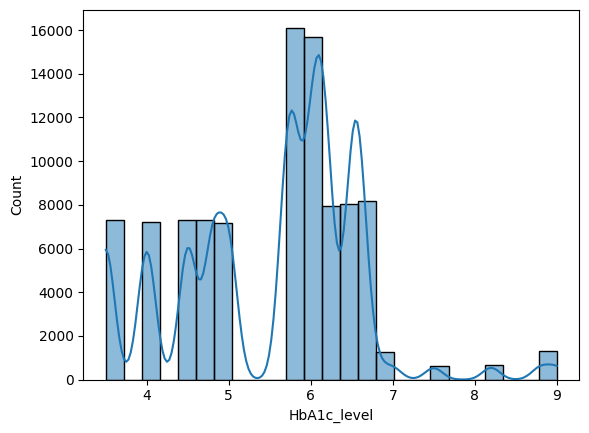

In [13]:
sns.histplot(df1['HbA1c_level'], kde = True, bins = 25) #make the histogram

The hbAic levels of people in the dataset is quite balanced

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

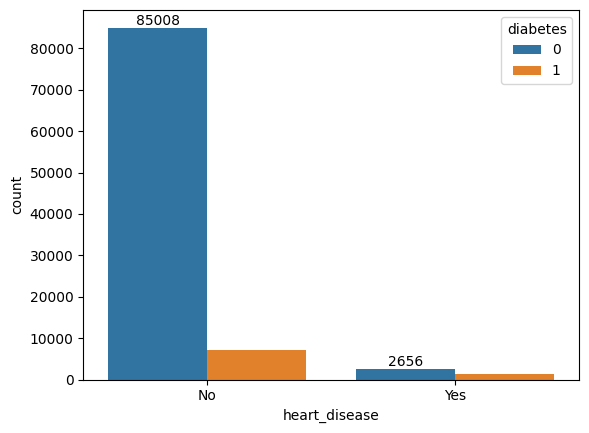

In [14]:
plot = sns.countplot(x = 'heart_disease', data = df1, hue = 'diabetes') #Find out the distribution of diabetes for people with heart disease
plot.bar_label(plot.containers[0], label_type='edge')
plot.set_xticklabels(['No','Yes'])

As can be see, people with heart disease have a much higher proportion to get diabetes than people with no heart disease

[Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')]

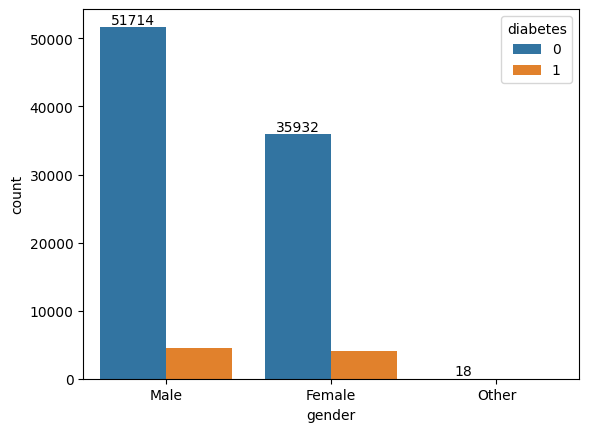

In [15]:
plot = sns.countplot(x = 'gender', data = df1, hue = 'diabetes') #Find out the distribution of diabetes for different genders
plot.bar_label(plot.containers[0], label_type='edge')
plot.set_xticklabels(['Male','Female','Other'])

The distribution of getting diabetes is equal between male and female

<bound method _AxesBase.set_xticklabels of <Axes: xlabel='smoking_history', ylabel='count'>>

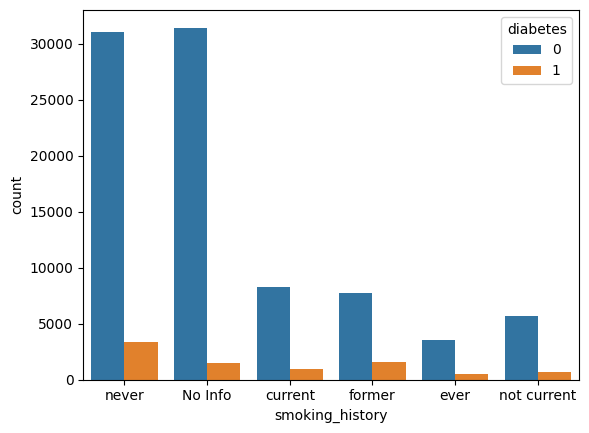

In [16]:
plot = sns.countplot(x = 'smoking_history', data = df1, hue = 'diabetes') #Find out the distribution of diabetes for smoking history and habits
plot.set_xticklabels

Former smokers have a higher likelihood to get diabetes compared to other groups, furthermore many people in the dataset seem to not smoke

<bound method _AxesBase.set_xticklabels of <Axes: xlabel='hypertension', ylabel='count'>>

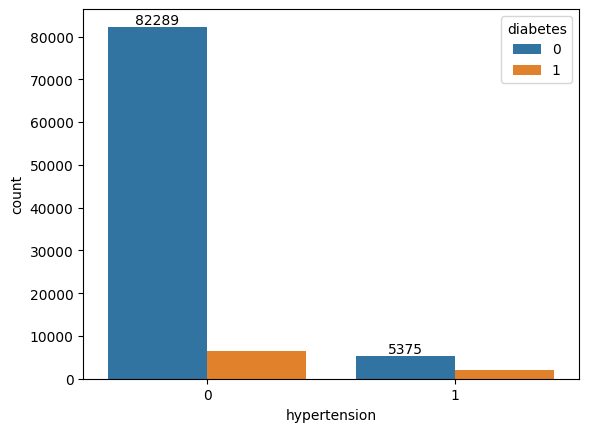

In [17]:
plot = sns.countplot(x = 'hypertension', data = df1, hue = 'diabetes') #Find out the distribution of diabetes for people who have hypertension or not
plot.bar_label(plot.containers[0], label_type='edge')
plot.set_xticklabels

People with hypertension is more likely to get diabetes from the distribution

---
# Chapter 5: Feature Engineering

Output the scatterplot containing the correlation score between the variables

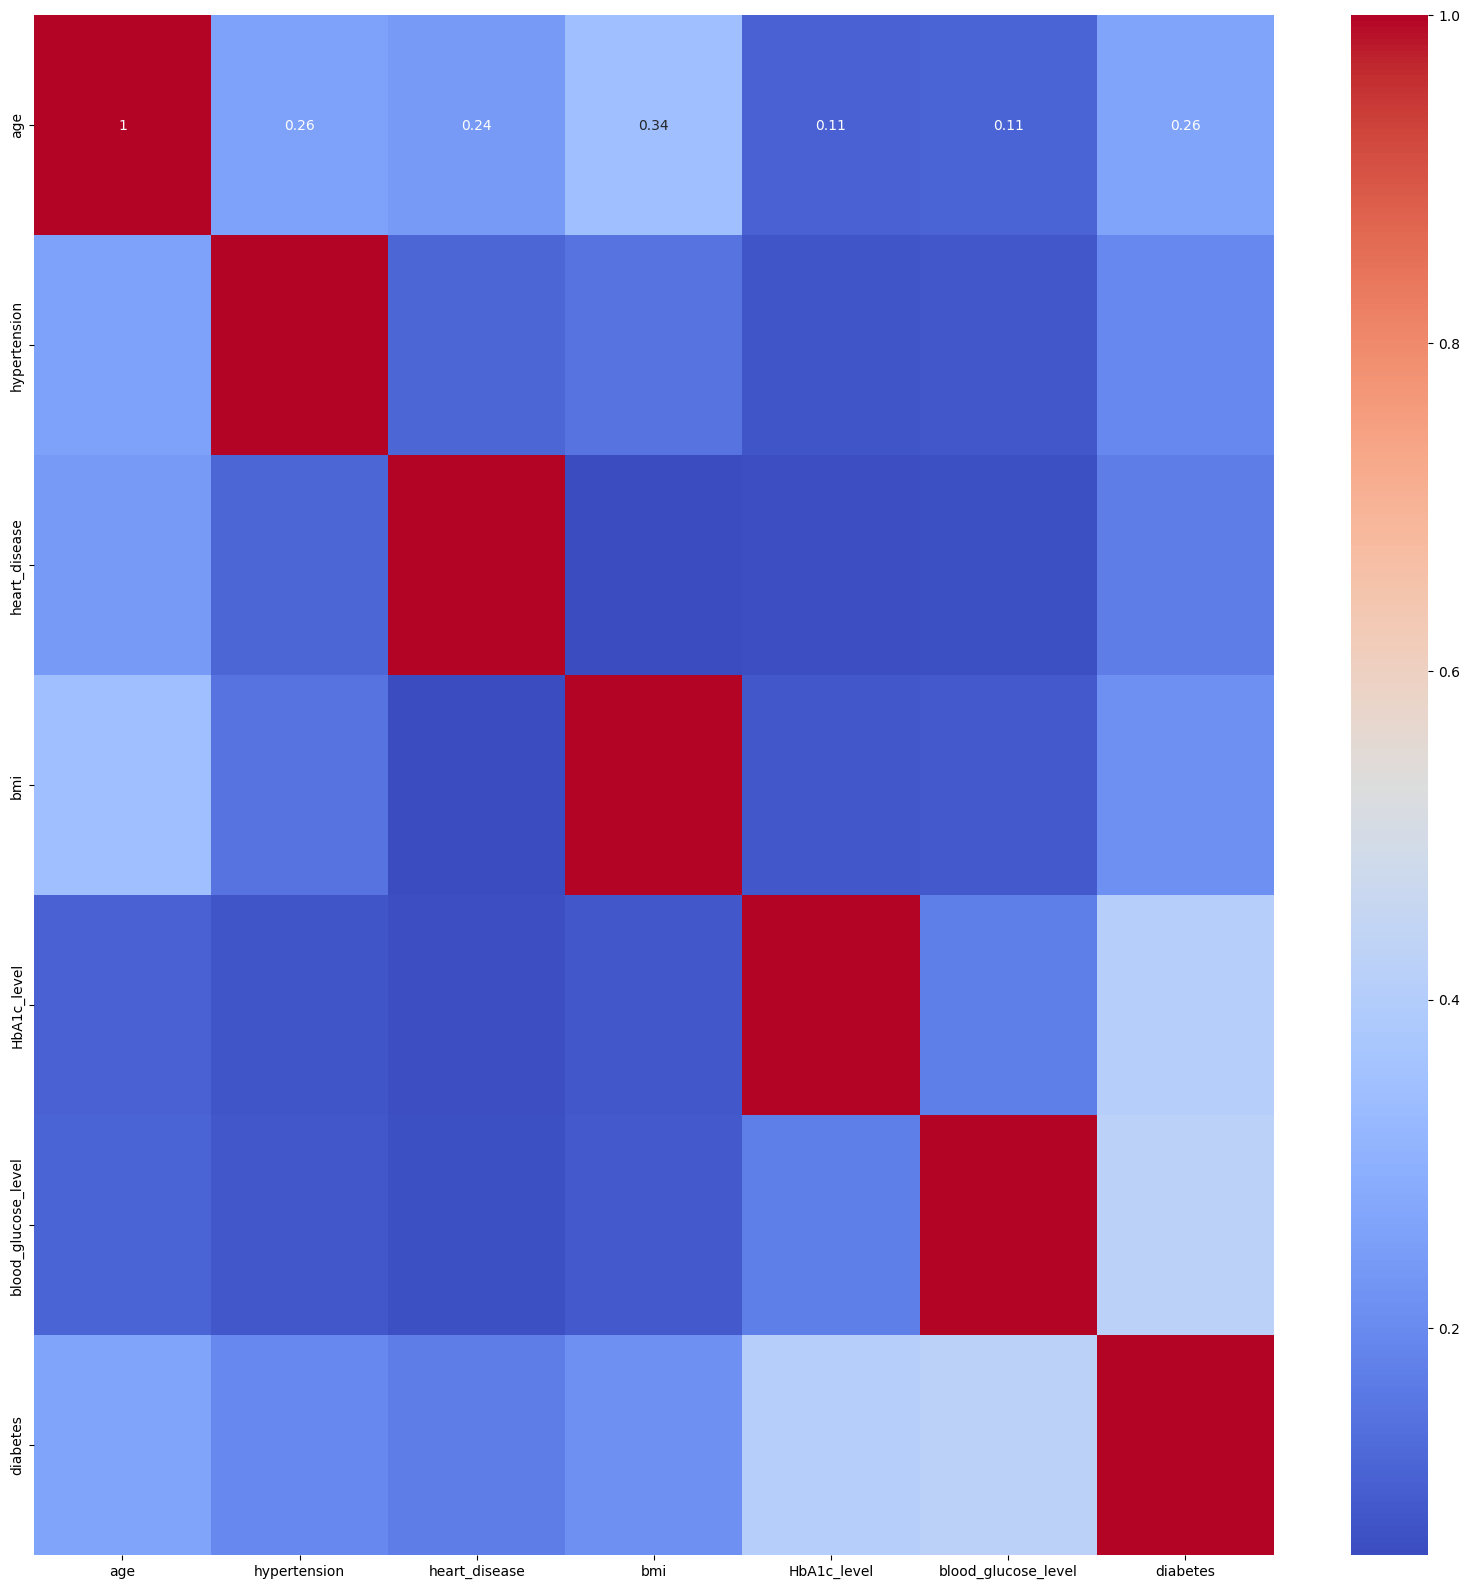

In [18]:
num_df1 = df1.select_dtypes('number')
plt.figure(figsize=(20, 20))
sns.heatmap(num_df1.corr(), annot=True, cmap = 'coolwarm') # Create a correation heatmap from seaborn with size 40 x 40 of the dataset
plt.show()

Create a new column classifying the BMI score to categories

In [19]:
bmi_cat= [] #using for loop and if to append the wanted value into a list and then add the value to the 'bmi category' column in the dataset

for i in df1['bmi']:
  if i <=18.5:
    bmi_cat.append('underweight')
  elif i >18.5 and i <= 25:
    bmi_cat.append('normal')
  elif i >25 and i <=30:
    bmi_cat.append('overweight')
  elif i >30:
    bmi_cat.append('obese')

df1['bmi_category'] = bmi_cat

df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,normal
5,Female,20.0,0,0,never,27.32,6.6,85,0,overweight
6,Female,44.0,0,0,never,19.31,6.5,200,1,normal
7,Female,79.0,0,0,No Info,23.86,5.7,85,0,normal
8,Male,42.0,0,0,never,33.64,4.8,145,0,obese
9,Female,32.0,0,0,never,27.32,5.0,100,0,overweight


In [20]:
df1.phik_matrix() #using phik correlation 

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
gender,1.000000,0.120131,0.008440,0.047258,0.182497,0.126786,0.040591,0.022637,0.022765,0.077374
age,0.120131,1.000000,0.346093,0.356501,0.379596,0.619393,0.145824,0.138176,0.361916,0.606318
hypertension,0.008440,0.346093,1.000000,0.187137,0.175122,0.170043,0.136777,0.157195,0.302461,0.223820
heart_disease,0.047258,0.356501,0.187137,1.000000,0.150389,0.084303,0.116349,0.144711,0.264765,0.110796
smoking_history,0.182497,0.379596,0.175122,0.150389,1.000000,0.252223,0.079026,0.065151,0.186136,0.282102
bmi,0.126786,0.619393,0.170043,0.084303,0.252223,1.000000,0.104252,0.098898,0.258900,0.905752
HbA1c_level,0.040591,0.145824,0.136777,0.116349,0.079026,0.104252,1.000000,0.308203,0.665948,0.119147
blood_glucose_level,0.022637,0.138176,0.157195,0.144711,0.065151,0.098898,0.308203,1.000000,0.794524,0.163266
diabetes,0.022765,0.361916,0.302461,0.264765,0.186136,0.258900,0.665948,0.794524,1.000000,0.301221
bmi_category,0.077374,0.606318,0.223820,0.110796,0.282102,0.905752,0.119147,0.163266,0.301221,1.000000


It is clear that bmi_category and bmi is multicollinear and that bmi_category has a better correlation score towards the target than bmi. Therefore bmi will be dropped and bmi_category will be used instead

In [21]:
df1 = df1.drop(['bmi'], axis =1) #dropping the variable

Set diabetes to be the target variable

In [22]:
X = df1.drop(['diabetes'], axis = 1) # drop diabetes in the feature variable and add diabetes to the dependent variable
y = df1['diabetes']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 20) #Train test split

In [24]:
X_train.info() #Output X_train information

<class 'pandas.core.frame.DataFrame'>
Index: 76916 entries, 21262 to 96224
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               76916 non-null  object 
 1   age                  76916 non-null  float64
 2   hypertension         76916 non-null  int64  
 3   heart_disease        76916 non-null  int64  
 4   smoking_history      76916 non-null  object 
 5   HbA1c_level          76916 non-null  float64
 6   blood_glucose_level  76916 non-null  int64  
 7   bmi_category         76916 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 5.3+ MB


Make a new dataset df1n_col to figure out the outlier percentage

In [25]:
df1n_col = X_train.select_dtypes(include = 'number')

In [26]:
df1n_col.head(10)

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level
21262,26.00,0,0,6.1,200
77706,72.00,0,0,6.0,158
81329,62.00,1,0,9.0,159
79962,63.00,0,0,5.0,158
43886,56.00,0,0,6.2,159
37531,1.64,0,0,4.8,100
76000,35.00,0,0,5.8,140
36677,80.00,1,1,8.2,140
87528,52.00,0,0,6.6,200
78892,19.00,0,0,6.6,130


In [27]:
df1n_col.columns

Index(['age', 'hypertension', 'heart_disease', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

Skewness of all numerical variables

In [28]:
for i in df1n_col:
    print(df1n_col[i].skew()) #skew function with for loop

-0.06482664615630998
3.169869777949486
4.6570166317286255
-0.0508677218901296
0.8266872446767434


Outlier percentage of all numerical variables

In [29]:
for i in df1n_col:

    q1 = df1n_col[i].quantile(0.25) 
    q3 = df1n_col[i].quantile(0.75)
    iqr = q3-q1

    up_bound_dist = q3 + 1.5*iqr
    low_bound_dist = q1 - 1.5*iqr

    print(f'Upper Boundary: {up_bound_dist:.2f}' )
    print(f'Lower Boundary: {low_bound_dist:.2f}')

    outlier = df1n_col[i][(df1n_col[i]<low_bound_dist) | (df1n_col[i]>up_bound_dist)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df1n_col[i]):.2f}%%')

Upper Boundary: 111.50
Lower Boundary: -28.50
Percentage of outliers: 0.00%%
Upper Boundary: 0.00
Lower Boundary: 0.00
Percentage of outliers: 7.71%%
Upper Boundary: 0.00
Lower Boundary: 0.00
Percentage of outliers: 4.06%%
Upper Boundary: 8.30
Lower Boundary: 2.70
Percentage of outliers: 1.37%%
Upper Boundary: 247.50
Lower Boundary: 11.50
Percentage of outliers: 2.09%%


There are some outliers in several variables such as hypertension

Cap the outliers using winsorizer method for X_train

In [30]:
winsoriser_norm= Winsorizer(capping_method='gaussian',  # winsorizer for normal/almost normal distribution using gaussian
                            tail='both',
                            fold=3,
                            variables=['HbA1c_level','age','hypertension','heart_disease'],
                            missing_values='ignore')

X_train_capped = winsoriser_norm.fit_transform(X_train)
X_test_capped = winsoriser_norm.transform(X_test)

winsoriser_iqr = Winsorizer(capping_method='iqr', # winsorizer for skewed distribution using iqr
                            tail='both',
                            fold=3,
                            variables=['blood_glucose_level'],
                            missing_values='ignore')

X_train_capped = winsoriser_iqr.fit_transform(X_train)
X_test_capped = winsoriser_iqr.transform(X_test)

Split the variables to 3 columns (numerical,categorical and numeric categorical)

In [31]:
n_col = X_train_capped[['HbA1c_level','blood_glucose_level','age']].columns.tolist() # column for numeral
c_col = X_train_capped.select_dtypes(include = ['object']).columns.tolist() # column for categorical
nc_col = X_train_capped[['hypertension','heart_disease']].columns.tolist() # column for numerical categorical
print('Numerical Columns:', n_col)
print('Categorical Columns:', c_col)
print('Numeric Categorical Columns:', nc_col)

Numerical Columns: ['HbA1c_level', 'blood_glucose_level', 'age']
Categorical Columns: ['gender', 'smoking_history', 'bmi_category']
Numeric Categorical Columns: ['hypertension', 'heart_disease']


Create the pipeline for numerical and categorical variables, for numerical variables it will be scaled via standard scaler, for the categorical variables, it will be encoded via ordinal encoder, for the numerical categorical columns, it will be passthrough.

Standard scaler is used because the variables here are measured at different scales and thus can create a bias

In [32]:
n_pipe = Pipeline([
    ('scaler', StandardScaler()) #define n pipe
])

c_pipe = Pipeline([
('encoder', OrdinalEncoder()) #define c pipe
])

pro_pipe = ColumnTransformer([ 
    ('pipe_num', n_pipe, n_col),
    ('pipe_cat', c_pipe, c_col)
], remainder = 'passthrough') #define preprocessing pipeline

pro_pipe.fit(X_train_capped) #fit the preprocessing pipeline


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['HbA1c_level', 'blood_glucose_level', 'age']),
                                ('pipe_cat',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'smoking_history',
                                  'bmi_category'])])

---
# Chapter 6: Model Definition

Create a model pipeline with the preprocessing pipeline above for svm, knn, decision tree, random forest and xgboost

In [33]:
p_svm = Pipeline([
    ('preprocessing', pro_pipe),
    ('svm',SVC())
]) #pipeline for svm model

In [34]:
p_dt = Pipeline([
    ('preprocessing', pro_pipe),
    ('dt',DecisionTreeClassifier( random_state = 20))
]) #pipeline for dt model

In [35]:
p_rf= Pipeline([
    ('preprocessing', pro_pipe),
    ('rf',RandomForestClassifier( random_state = 20))
]) #pipeline for rf model

In [36]:
p_knn= Pipeline([
    ('preprocessing', pro_pipe),
    ('rf',KNeighborsClassifier())
]) #pipeline for knn model

In [37]:
p_xg= Pipeline([
    ('preprocessing', pro_pipe),
    ('rf',xgb.XGBClassifier())
]) #pipeline for xg model

Define the Models for cross validation to figure out the best model to use

Define the skfold and run each model for cross validation to figure which model have the best recall score

In [38]:

skfold = StratifiedKFold(n_splits = 5) #cross validation
cv_svm = cross_val_score(p_svm, X_train_capped,y_train,cv = skfold, scoring = 'recall',n_jobs=-1)
cv_knn = cross_val_score(p_knn, X_train_capped,y_train,cv = skfold, scoring = 'recall',n_jobs=-1)
cv_dt = cross_val_score(p_dt, X_train_capped,y_train,cv = skfold, scoring = 'recall',n_jobs=-1)
cv_rf = cross_val_score(p_rf, X_train_capped,y_train,cv = skfold, scoring = 'recall',n_jobs=-1)
cv_xg = cross_val_score(p_xg, X_train_capped,y_train,cv = skfold, scoring = 'recall',n_jobs=-1)

Recall is used as the main indicator for model success in this analysis since the existence of false negative in this case (where people are predicted to not have diabetes but indeed the person did have the disease) can lead to fatal consequences

Append the results of the cross validation to a list

In [39]:
name_model = []
cv_scores = 0

for cv,name in zip([cv_svm,cv_dt,cv_rf,cv_knn,cv_xg],
                    ['svm_model','dt_model','rf_model','knn_model','xg_model']):
    print(name)
    print('recall - ALL - Cross Validation: ', cv)
    print('recall - Mean - Cross Validation ', cv.mean())
    print('recall - std - Cross Validation ', cv.std())
    print('recall - Range of Test Set - Cross Validation ', (cv.mean() - cv.std()),'-',(cv.mean() + cv.std()))
    print('-' * 50)

# Create condition to find best model based on cv.mean()
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

# Create conclusion to find best model based on cv.mean()
print('Best Model: ', name_model)
print('Cross_val_mean from best model:', cv_scores)

svm_model
recall - ALL - Cross Validation:  [0.57142857 0.53721444 0.57406043 0.55490052 0.57069219]
recall - Mean - Cross Validation  0.5616592305429873
recall - std - Cross Validation  0.013957449430919528
recall - Range of Test Set - Cross Validation  0.5477017811120678 - 0.5756166799739068
--------------------------------------------------
dt_model
recall - ALL - Cross Validation:  [0.75478645 0.71628592 0.73691968 0.72733972 0.73637703]
recall - Mean - Cross Validation  0.7343417592519235
recall - std - Cross Validation  0.012679235606423794
recall - Range of Test Set - Cross Validation  0.7216625236454997 - 0.7470209948583473
--------------------------------------------------
rf_model
recall - ALL - Cross Validation:  [0.7083947  0.66543847 0.69786293 0.68091378 0.69145803]
recall - Mean - Cross Validation  0.6888135810280627
recall - std - Cross Validation  0.014704467370769893
recall - Range of Test Set - Cross Validation  0.6741091136572928 - 0.7035180483988326
---------------

According to the cross validation analysis throught looking at the mean score, decision tree is the best model to be used in which i will then use the model for our classfication project

---
# Chapter 7: Model Training

DT Model 

Fit the decision tree to the variables

In [40]:
p_dt.fit(X_train_capped,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['HbA1c_level',
                                                   'blood_glucose_level',
                                                   'age']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'smoking_history',
                                                   'bmi_category'])])),
                ('dt', DecisionTreeClassifier(random_state=20))])

Train the model by predicting to train set

In [41]:
y_dt_pred_train_old= p_dt.predict(X_train_capped) #predict X_train_capped with dt model with pipeline
y_dt_pred_train_old

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Print the classification report

In [42]:
print(classification_report(y_train, y_dt_pred_train_old)) #Print the classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70129
           1       1.00      0.95      0.97      6787

    accuracy                           1.00     76916
   macro avg       1.00      0.98      0.99     76916
weighted avg       1.00      1.00      1.00     76916



The train model looks good, everything is almost perfect including recall

Display the confusion matrix

Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000028E09C8EE10>


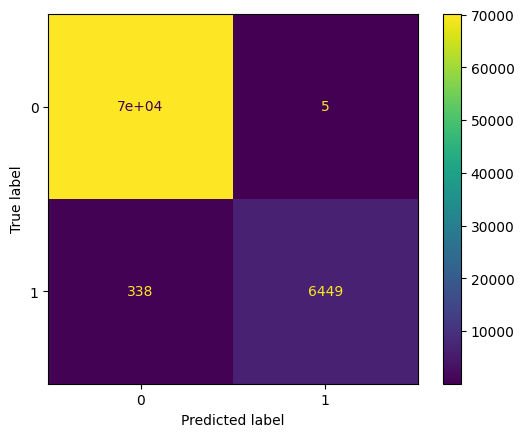

In [43]:
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_estimator(p_dt, X_train_capped, y_train))

Predict the test variable using decision tree

In [44]:
y_dt_pred_test_old= p_dt.predict(X_test_capped) #predict X_test_capped with dt model with pipeline
y_dt_pred_test_old

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Print the classification report for the test variable

In [45]:
print(classification_report(y_test, y_dt_pred_test_old))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17535
           1       0.72      0.74      0.73      1695

    accuracy                           0.95     19230
   macro avg       0.85      0.86      0.85     19230
weighted avg       0.95      0.95      0.95     19230



The test variables have ok result for recall. However the difference of the result between train and test model means that the model is still overfit

Display the confusion matrix

Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000028E0E7033D0>


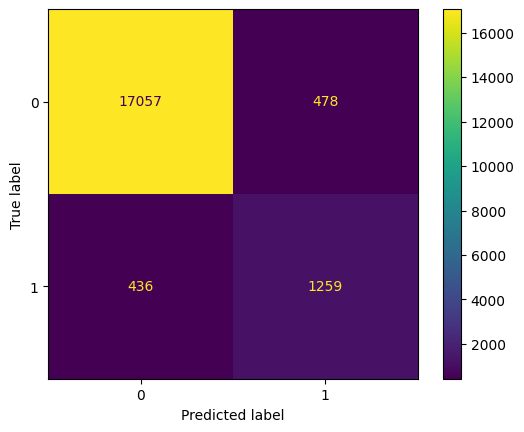

In [46]:
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_estimator(p_dt, X_test_capped, y_test))

Hyperparameter Tuning

Due to the presence of overfit, hyperparameter tuning will be done to make it a goodfit and hopefully increase the recall score as well. As you can see there is a lot of false negative (441) values in the test, it is hoped that hyperparameter tuning will change that

Declare the parameters for grid search

In [47]:
max_depth = [int(x) for x in np.linspace(10, 20000, 10)] #these are the parameters and the value of the said that the grid search will review
min_samples_split = [4,6,8,10,12]
min_samples_leaf = [10,12,14,16,18]
criterion = ['gini','entropy']
class_weight = ['balanced']


grid_params = {'dt__max_depth':max_depth,
               'dt__criterion': criterion,
                'dt__min_samples_split':min_samples_split,
                'dt__min_samples_leaf':min_samples_leaf,
                'dt__class_weight': class_weight
                }


Conduct a grid search with the above parameters with emphasis on maximizing recall score

In [48]:
grid_dt = GridSearchCV(p_dt, param_grid= grid_params , cv = 5,scoring = 'recall',n_jobs = 4) #do the grid search and fit it to the variables
grid_dt.fit(X_train_capped,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['HbA1c_level',
                                                                          'blood_glucose_level',
                                                                          'age']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['gender',
                                                                          'smoking_history',
                                                                          'bmi_category'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=20))]),
             n_jobs=4,
             param_grid={'dt__class_weight': ['balanced'],
                         'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [10, 2231, 4452, 6673, 8894, 11115,
                                           13336, 15557, 17778, 20000],
                         'dt__min_samples_leaf': [10, 12, 14, 16, 18],
                         'dt__min_samples_split': [4, 6, 8, 10, 12]},
             scoring='recall')

Output the best estimators and the best parameters. The best parameter is saved in best_dt

In [49]:
best_param_dt = grid_dt.best_params_ #output best parameter
print(best_param_dt)
print('\n')
best_dt = grid_dt.best_estimator_ #output best estimator
print(best_dt)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_rf.columns)

{'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_leaf': 18, 'dt__min_samples_split': 4}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['HbA1c_level',
                                                   'blood_glucose_level',
                                                   'age']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'smoking_history',
                                  

fit the decision tree with best parameter towards train variables

In [50]:
best_dt.fit(X_train_capped, y_train) #fit the variables with the best_dt model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['HbA1c_level',
                                                   'blood_glucose_level',
                                                   'age']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'smoking_history',
                                                   'bmi_category'])])),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=18,
                                        min_samples_split=4,
                                        random_state=20))])

---
# Chapter 8: Model Evaluation

Predict the train variable using best dt

In [51]:
y_dt_pred_train_= best_dt.predict(X_train_capped) #predict X_train_capped with best_dt
y_dt_pred_train_

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

print the classification report, the recall  score as well as the classification matrix

In [52]:
print(classification_report(y_train, y_dt_pred_train_))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     70129
           1       0.40      0.94      0.57      6787

    accuracy                           0.87     76916
   macro avg       0.70      0.90      0.75     76916
weighted avg       0.94      0.87      0.89     76916



In [53]:
print('Recall    : ', recall_score(y_train, y_dt_pred_train_))

Recall    :  0.9422425224694269


Print the confusion matrix

Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000028E09E94A90>


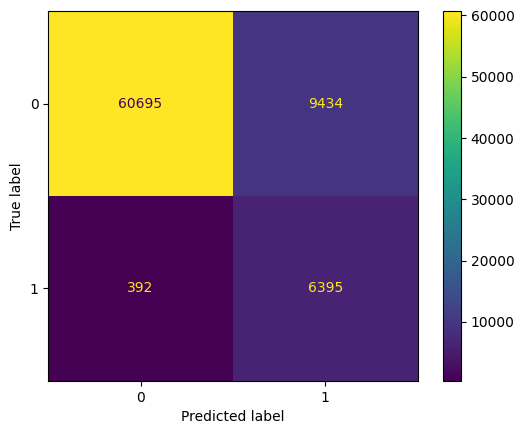

In [54]:
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_estimator(best_dt, X_train_capped, y_train))

After the hyperparameter tuning, recall score decreases in the train dataset

There is 392 false negative values in the train dataset after hyperparameter tuning compared to 338 false negative in the train set, there is a slight increase of false negative values


Predict the test variables with the dt model after hyperparameter tuning

In [55]:
y_dt_pred_test_= best_dt.predict(X_test_capped) #predict X_test_capped with best_dt
y_dt_pred_test_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Print the classification report, recall  score as well as the classification matrix 

In [56]:
print(classification_report(y_test, y_dt_pred_test_))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     17535
           1       0.41      0.94      0.57      1695

    accuracy                           0.87     19230
   macro avg       0.70      0.90      0.75     19230
weighted avg       0.94      0.87      0.89     19230



In [57]:
print('Recall    : ', recall_score(y_test, y_dt_pred_test_))

Recall    :  0.9392330383480826


Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000028E0E033990>


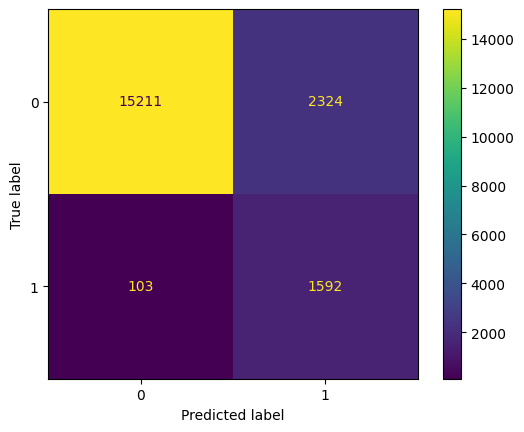

In [58]:
print('Confusion Matrix: ', ConfusionMatrixDisplay.from_estimator(best_dt, X_test_capped, y_test))

After the hyperparameter tuning of the test dataset, recall score increases whereas precision and f1 score decreases whereas accuracy decreases slightly. The recall score is 0.94.

However since the primary concern of the prediction is the amount of false negatives, this is a necessary tradeoff. Compared with the dt model before hyperparameter tuning, the prediction has a higher recall score.

Before there is 436 false negative value but it is decreased to 103 false negative values after hyperparameter tuning, this is a huge increase in recall performance

This means that this model can predict whether the person has diabetes with 94% accuracy and that the rate of false negatives (missed diagnosis) is reduced significantly which can be seen by the 0.94 recall score, furthermore the model is good fit due to train and test recall scores having similar value

---
# Chapter 9: Model Saving

Save the tools, numerical and categorical columns as well as the best modell

In [59]:
with open('best_dt.pkl', 'wb') as file_1: #save the model
  pickle.dump(best_dt, file_1)
with open('n_col.txt','w') as file_4:
  json.dump(n_col,file_4)
with open('c_col.txt', 'w') as file_5:
  json.dump(c_col,file_5)
with open('nc_col.txt', 'w') as file_6:
  json.dump(nc_col,file_6)

Inference is done in a seperate document 'P1M2_Bryan_Robinson_inf.ipynb"

---
# Conclusion

**Overall Insights**:

- The Model has a 94% recall rate which means that false negative errors are quite low, this is important as a false negative can have serious consequences in this case which can result in serious injury or even death of a patient due to missed diagnosis
- The model is of goodfit
- The dataset is inbalanced in which true negative exceeds true positive by a large margin as it should be. However, SMOTE is not used due to the amount of variables which is already large enough for training

With this decision tree(dt) model, the user can predict whether the person has diabetes or not with high accuracy and with low false negatives 

**Strength and Weakness**:

**Strength**:
- The DT model has a very high recall which means that the incident of false negative is minimized
- Model has good fit due to similar recall score

**Weakness**:
- There is still some false negative values in the model

**Further Improvements**:
-  inclusion of more data may increase overall score of the model
- Using One Hot Encoder may be able to make the result better

---
# Conceptual Problems

1. Explain the background of bagging and how bagging works ?

Bagging or bootstrap aggragating is a part of ensemble learning which multiple models are combined to make an optimal model. It is an ensemble leanring method that seeks to improve the accuracy of the model as well as to minimize overfitting. Simply put bootstraping is first done which is the method of randomly creating samples of data out of the population of a dataset to estimate a parameter and that bagging is just aggregating multiple bootstraps together.

2. Explain the difference between the mechanism of random forest algorithm and the boosting algorithm that you chose ?

I chose XG boost algorithm for the algorithm that is to be cross validated. Both XG boost and random forest are tree models. Random forest is a bagging method which seeks to train multiple trees in parallel and that the final output is decided from the result of the majority of trees whereas XG boost creates a sequential ensemble of tree models in which all work to improve each other and thus determine the final output.

3. Explain what does cross validation mean

Cross validation is a technique that can evaluate the performance of model of unseen data. It uses folds as a validating set and training the model with those folds. The process is repeated a multiple times using different folds. The results from each validation step is then average to create the final estimate of the models performance. It is a good way to determine the best model to be used for the analysis